<a href="https://colab.research.google.com/github/GenAIUnplugged/langGraph_series/blob/main/basic_langgraph_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U langgraph langsmith

In [2]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [3]:
from google.colab import userdata
import os
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

In [4]:
from langchain.chat_models import init_chat_model
llm = init_chat_model("gpt-4o-mini")

In [5]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [6]:
graph_builder.add_edge(START, "chatbot")

In [7]:
graph = graph_builder.compile()

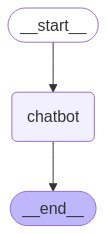

In [8]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [9]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: hello
Assistant: Hello! How can I assist you today?
User: national animal of india
Assistant: The national animal of India is the Bengal tiger (Panthera tigris tigris). It symbolizes strength, grace, and power, and is an important part of India's rich biodiversity and cultural heritage. The Bengal tiger is also a key species for conservation efforts in the country.
User: when india got independence ?
Assistant: India gained independence from British rule on August 15, 1947.
User: when is the independence day
Assistant: Independence Day varies by country. For example:

- In the United States, Independence Day is celebrated on July 4th, marking the adoption of the Declaration of Independence in 1776.
- In India, Independence Day is celebrated on August 15th, commemorating the end of British rule in 1947.
- In Mexico, Independence Day is celebrated on September 16th, marking the start of the Mexican War of Independence in 1810.

If you have a specific country in mind, please let me 

KeyboardInterrupt: 